# Working with ML models for Time Series Analysis

In this section, we will prepare the data for machine learning analysis by creating lagged variables. We will work with both stationary and non-stationary data. Three of the datasets that we are using are seasonally adjusted for stationarity through differencing. The two financial datasets are only resampled from daily to monthly data.  We will create kernel density and autocorrelation plots as well as generate lag variables for a 12-time step period. We will then save these new dataframes.  These dataframes will be used in the next 3 videos.

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

## Example 1: Vacation Dataset

In [2]:
# Read in data as a panda series
# https://trends.google.com/trends/?geo=US , google trends, search the word "vacation"

vacation = pd.read_csv("vacation_firstdiff.csv", index_col=0, parse_dates=True)

            first_diff
Month                 
2004-04-01        -7.0
2004-05-01        10.0
2004-06-01         9.0
2004-07-01        -2.0
2004-08-01       -17.0


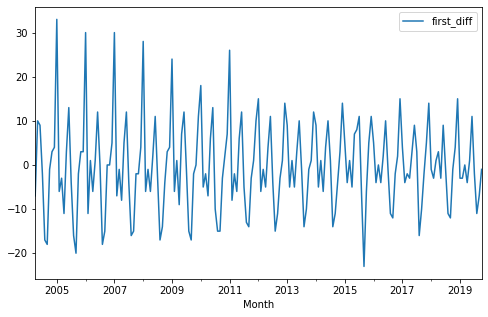

In [3]:
# display first few rows
print(vacation.head(5))
# line plot of dataset
vacation.plot(figsize=(8,5))
pyplot.show()
# data is monthly and is made stationary

The plot shows that seasonality and trend were removed from the series through differening. Above is the plot of the differenced data.

### Kernel Density Plot

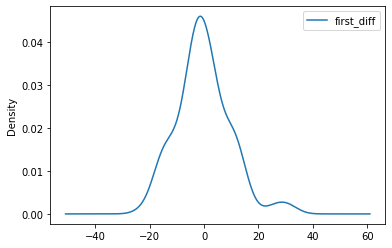

In [4]:
vacation.plot(kind='kde')

### Autocorrelation Plot 

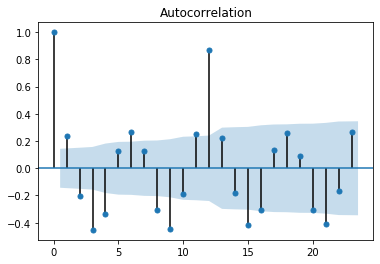

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
# Check for autocorrelation of each lagged observation and whether it is statistically significant.
plot_acf(vacation)
pyplot.show()

The blue shaded region is the margin of uncertainty. Candlesticks that extend out beyond the blue shaded region are considered statistically significant.  Correlation values are between 1 and -1.

### Create Lagged Variables

In [6]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [7]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months
for i in range(12,0,-1):
    df1[['t-'+str(i)]] = vacation.shift(i)
print(df1)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6  t-5   t-4   t-3   t-2  \
Month                                                                         
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  -7.0  10.0   9.0   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0 -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0 -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0  0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0 -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0

In [8]:
# Create column t
df1['t'] = vacation.values
print(df1.head(13))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2004-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0   
2004-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   
2004-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0   
2004-09-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0   
2004-10-01   NaN   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0   
2004-11-01   NaN   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0   
2004-12-01   NaN   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   
2005-01-01   NaN   NaN   NaN  -7.0  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   
2005-02-01   NaN   NaN  -7.0  10.0   9.0

In [9]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df1_vacat = df1[13:]
print(df1_vacat)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
Month                                                                          
2005-05-01  10.0   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0   
2005-06-01   9.0  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   
2005-07-01  -2.0 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0   
2005-08-01 -17.0 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0   
2005-09-01 -18.0  -1.0   3.0   4.0  33.0  -6.0  -3.0 -11.0   3.0  13.0  -4.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-06-01   9.0  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   
2019-07-01  -1.0 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0   
2019-08-01 -11.0 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0   
2019-09-01 -12.0  -1.0   4.0  15.0  -3.0  -3.0   0.0  -4.0   1.0  11.0  -2.0   
2019-10-01  -1.0   4.0  15.0  -3.0  -3.0

In [10]:
# save to new file
df1_vacat.to_csv('vacation_lags_12months_features.csv', index=False)